<a href="https://colab.research.google.com/github/juanscc2/ProyectoBigData/blob/main/Proyecto_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Big Data Análisis de fidelización de clientes en bancos.

**Integrantes**
* Juan Sebastian Cortes Chia
* Jhonatan Rios Tapiero
* Santiago Guerrero Chamorro
* Roger Alberto Arias Triana


In [48]:
#Se importa la información desde el drive para obtener información acerca del dataset que se va a usarmediante la libreria google.colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
#Se importa el dataset con los datos a usar en el proyecto y se podrán visualizar los datos mediante una tabla
file_path = '/content/drive/MyDrive/ProyectoSeminarioBigData/data/Churn_Modelling.csv'
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df["Exited"].replace({0:"Si",1:"No"},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,No
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Si
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,No
3,699,France,Female,39,1,0.00,2,0,0,93826.63,Si
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Si


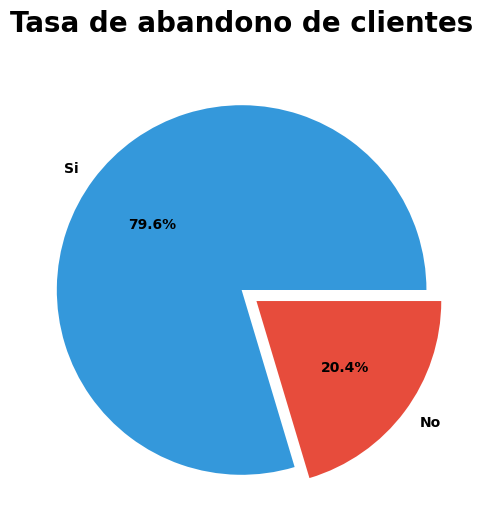

In [51]:
#En el siguiente apartado de codigo realizamos un analisis acerca de la variable "Exited" para evidenciar la tasa de abandono de clientes del dataset analizado.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))

custom_colors = ["#3498db", "#e74c3c"]

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=custom_colors,
        textprops={"fontweight":"black"}, explode=[0,0.1])
plt.title("Tasa de abandono de clientes", fontweight="black", size=20, pad=20)

plt.show()


**Analisis grafica pastel**

Al analizar la tasa de abandono de clientes en el banco, se pueden observar varios aspectos importantes. La gráfica de pastel presentada se enfoca en el porcentaje de clientes que han abandonado el banco, destacando la variable "Exited".

Según la gráfica, el 20.4% de los clientes ha abandonado el banco, lo cual es una cifra significativa que merece atención. Sin embargo, es importante resaltar que el 79.6% de los clientes sigue confiando en los servicios del banco. Este equilibrio indica que, a pesar de una tasa notable de abandono, la gran mayoría de los clientes está satisfecha con los servicios proporcionados.

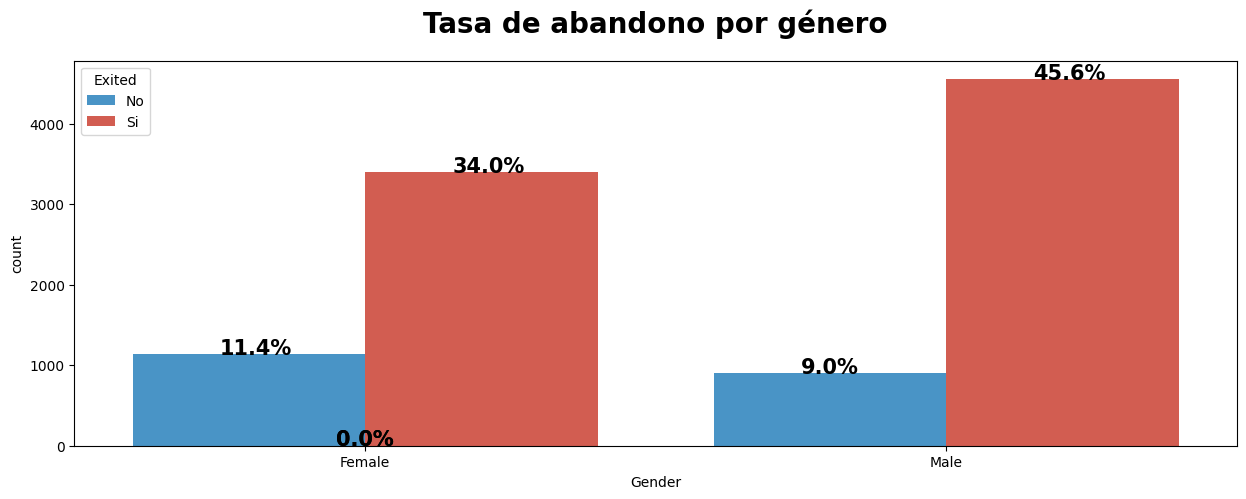

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para crear la gráfica de barras
def countplot(column):
    plt.figure(figsize=(15,5))
    custom_palette = ["#3498db", "#e74c3c"]  # Colores personalizados: azul y rojo
    ax = sns.countplot(x=column, data=df, hue="Exited", palette=custom_palette)
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x, y), fontweight="black", size=15)

    plt.title(f"Tasa de abandono por género", fontweight="black", size=20, pad=20)
    plt.show()

# Llamada a la función para mostrar la gráfica
countplot("Gender")




<ipython-input-53-f6184f21aee8>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




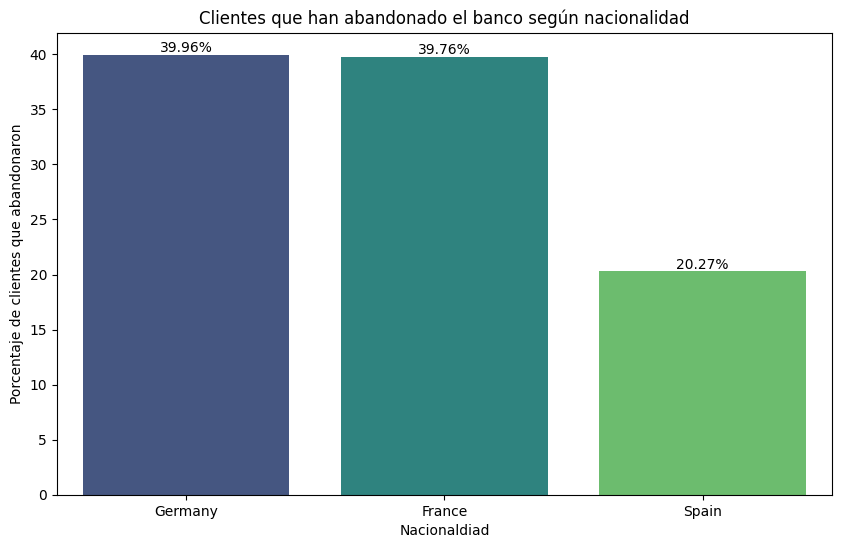

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV usando la variable file_path
data = pd.read_csv(file_path)

# Contar el número de clientes que abandonaron según su ubicación geográfica
geography_churn = data[data['Exited'] == 1]['Geography'].value_counts()

# Calcular el porcentaje
total_churn = geography_churn.sum()
geography_churn_percentage = (geography_churn / total_churn) * 100

# Graficar los datos
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=geography_churn_percentage.index, y=geography_churn_percentage.values, palette='viridis')

# Agregar los porcentajes sobre las barras
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f%%')

plt.title('Clientes que han abandonado el banco según nacionalidad')
plt.xlabel('Nacionaldiad')
plt.ylabel('Porcentaje de clientes que abandonaron')
plt.show()




Analisis

<ipython-input-54-2be1d43a37fe>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




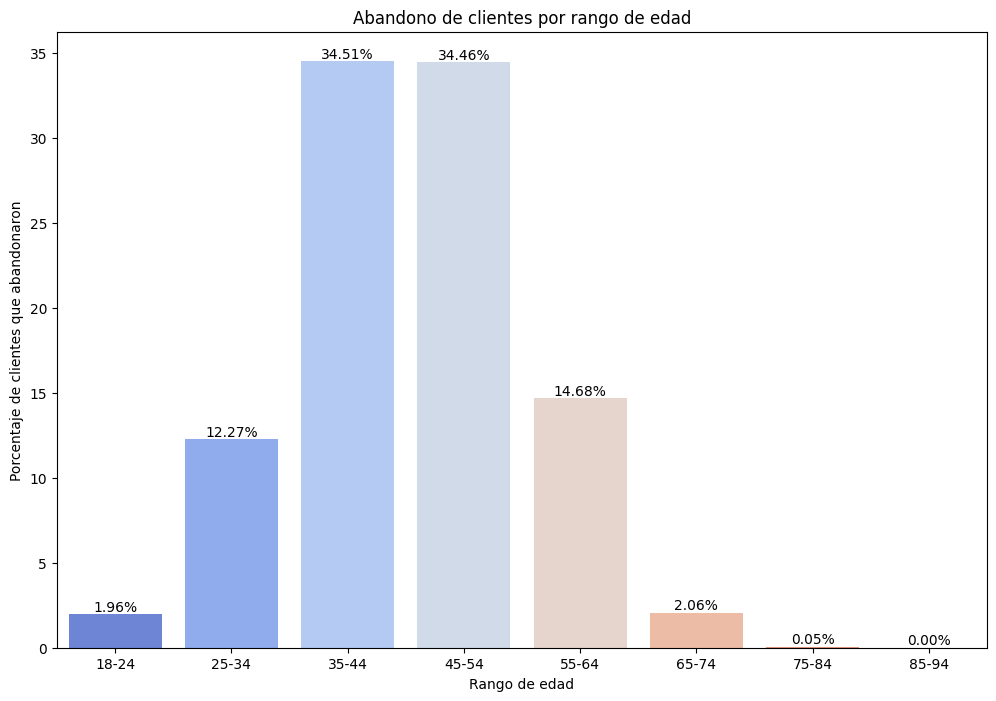

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV usando la variable file_path
data = pd.read_csv(file_path)

# Definir los rangos de edad
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94']
data['AgeRange'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Contar el número de clientes que abandonaron según su rango de edad
age_churn = data[data['Exited'] == 1]['AgeRange'].value_counts().sort_index()

# Calcular el porcentaje
total_age_churn = age_churn.sum()
age_churn_percentage = (age_churn / total_age_churn) * 100

# Graficar los datos
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=age_churn_percentage.index, y=age_churn_percentage.values, palette='coolwarm')

# Agregar los porcentajes sobre las barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%')

plt.title('Abandono de clientes por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje de clientes que abandonaron')
plt.show()


Los resultados de esta grafica indican que ciertos rangos de edad tienen tasas de abandono significativamente más altas que otros. Por ejemplo, el rango de edad de 35-44 años muestra el mayor porcentaje de abandono, seguido por el rango de 45-54 años. Por otro lado, los rangos de edad de 18-24 y 75-84 años tienen las tasas de abandono más bajas.

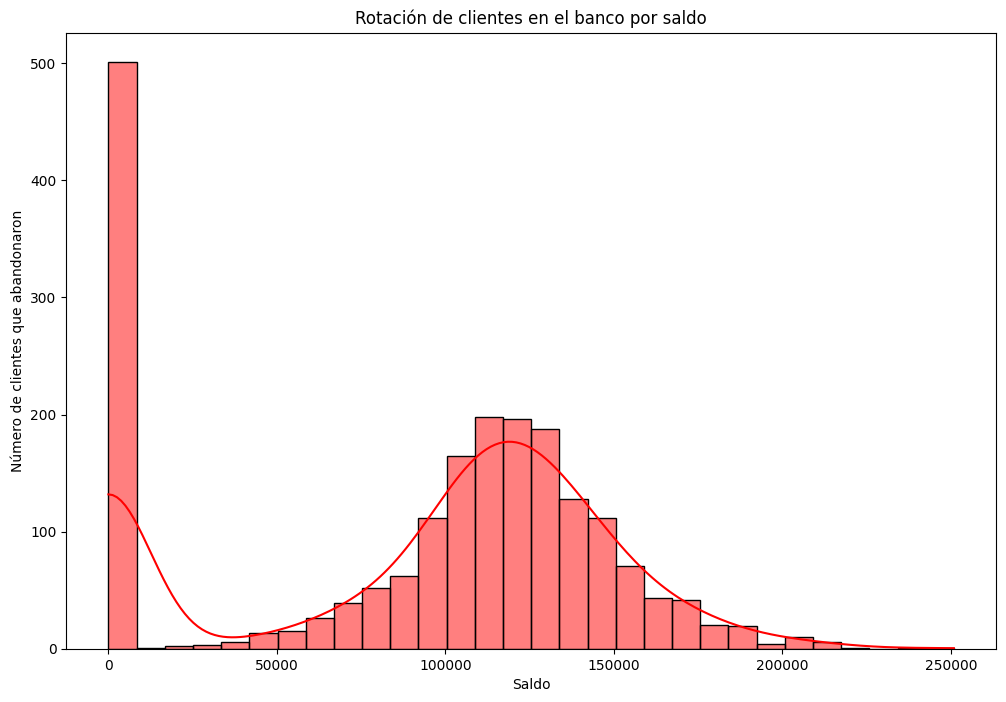

Saldo total perdido debido a la pérdida de clientes: $185588094.63


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(file_path)


balance_churn = data[data['Exited'] == 1]['Balance']


total_balance_lost = balance_churn.sum()


plt.figure(figsize=(12, 8))
sns.histplot(balance_churn, bins=30, kde=True, color='red')

plt.title('Rotación de clientes en el banco por saldo')
plt.xlabel('Saldo')
plt.ylabel('Número de clientes que abandonaron')
plt.show()

# Mostrar el total del balance perdido
print(f'Saldo total perdido debido a la pérdida de clientes: ${total_balance_lost:.2f}')


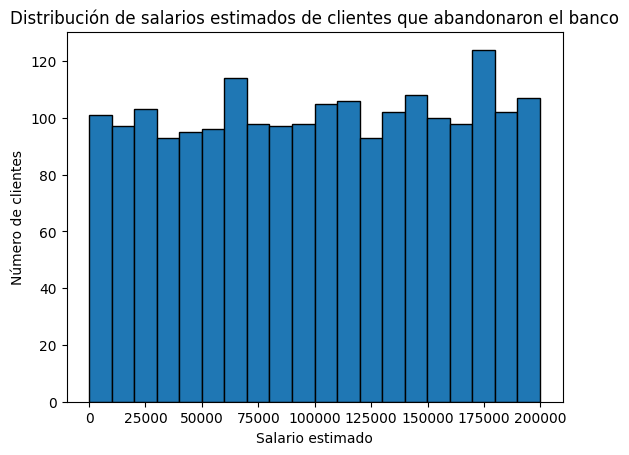

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos
df = pd.read_csv(file_path)

# Filtramos los clientes que han sido despedidos
despedidos = df[df['Exited'] == 1]

# Creamos el histograma
plt.hist(despedidos['EstimatedSalary'], bins=20, edgecolor='black')
plt.title('Distribución de salarios estimados de clientes que abandonaron el banco')
plt.xlabel('Salario estimado')
plt.ylabel('Número de clientes')
plt.show()


La mayoría de los clientes que abandonaron el banco tienen salarios estimados en el rango de 50,000 a 75,000, lo que indica que este grupo de ingresos es el más afectado por el abandono por parte de los clientes.
A medida que aumenta el salario estimado, el número de clientes que abandonan el banco disminuye, lo que sugiere que los clientes con salarios más altos tienden a permanecer con el banco.
Hay muy pocos clientes con salarios estimados superiores a 150,000 que han dejado el banco, lo cual influye en la permanencia de los clientes en el banco, lo cual significa que las personas con ingresos mas altos tienden a permanecer en el banco.
Análisis e Implicaciones para el Banco:

•	Estrategias de Retención: El banco podría centrarse en desarrollar estrategias de retención específicas para clientes en el rango de salario de 50,000 a 75,000, ya que representan la mayor proporción de desvinculaciones.
•	Satisfacción del Cliente: Es importante investigar las razones detrás de la alta tasa de desvinculación en este grupo de ingresos. Esto podría incluir encuestas de satisfacción del cliente o análisis de retroalimentación para identificar áreas de mejora.
•	Ofertas Personalizadas: Considerar la implementación de ofertas personalizadas o incentivos para clientes en este rango de salario para aumentar la lealtad y reducir la desvinculación.
•	Análisis de Datos Adicionales: Sería útil analizar otros factores que podrían estar correlacionados con la desvinculación, como la edad, el género, el balance de la cuenta, y el uso de productos bancarios, para obtener una comprensión más completa del problema.


In [57]:
!pip install --upgrade dash jupyter-dash


In [58]:
# Importar las librerías necesarias
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Cargar los datos
file_path = '/content/drive/MyDrive/ProyectoSeminarioBigData/data/Churn_Modelling.csv'  # Asegúrate de que esta ruta es correcta
data = pd.read_csv(file_path)
total_rows = len(data)

# Crear la columna AgeRange
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['AgeRange'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Inicializar la aplicación Dash
app = Dash(__name__)

# Definir el layout de la aplicación
app.layout = html.Div([
    html.H1("Dashboard Interactivo de Análisis de Deserción de Clientes"),

    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Tasa de Deserción', value='tab-1'),
        dcc.Tab(label='Deserción por Género', value='tab-2'),
        dcc.Tab(label='Deserción por Nacionalidad', value='tab-3'),
        dcc.Tab(label='Deserción por Rango de Edad', value='tab-4'),
        dcc.Tab(label='Rotación por Saldo', value='tab-5'),
        dcc.Tab(label='Distribución de Salarios Estimados', value='tab-6')  # New tab
    ]),
    html.Div(id='tabs-content')
])

# Callbacks para actualizar el contenido de las pestañas
@app.callback(Output('tabs-content', 'children'),
              Input('tabs', 'value'))
def render_content(tab):
    try:
        if tab == 'tab-1':
            # Gráfica para la Tasa de Deserción
            if 'Exited' not in data.columns:
                return html.Div('Error: La columna "Exited" no existe en los datos.')
            count = data["Exited"].value_counts()
            percentage = (count / total_rows) * 100
            fig = px.pie(names=percentage.index, values=percentage.values, title='Tasa de Deserción de Clientes')
            fig.update_traces(textinfo='percent+label')
            fig.update_layout(legend_title_text='Estado de Deserción', title_x=0.5)
            return html.Div([
                dcc.Graph(figure=fig)
            ])
        elif tab == 'tab-2':
            # Gráfica para la Deserción por Género
            if 'Gender' not in data.columns or 'Exited' not in data.columns:
                return html.Div('Error: Las columnas "Gender" o "Exited" no existen en los datos.')
            count = data.groupby('Gender')['Exited'].sum()
            percentage = (count / total_rows) * 100
            fig = px.bar(x=percentage.index, y=percentage.values, title='Deserción de Clientes por Género',
                         labels={'x': 'Género', 'y': 'Porcentaje'},
                         text=percentage.values)
            fig.update_traces(marker_color=['red', 'blue'], texttemplate='%{text:.2f}%', textposition='outside')
            fig.update_layout(
                legend_title_text='Género',
                title_x=0.5,
                uniformtext_minsize=8,
                uniformtext_mode='hide',
                xaxis_title='Género',
                yaxis_title='Porcentaje',
                yaxis=dict(tickformat='.0%'),
                bargap=0.2,
                plot_bgcolor='rgba(0,0,0,0)',
                margin=dict(l=20, r=20, t=40, b=20)
            )
            return html.Div([
                dcc.Graph(figure=fig)
            ])
        elif tab == 'tab-3':
            # Gráfica para la Deserción por Nacionalidad
            if 'Geography' not in data.columns or 'Exited' not in data.columns:
                return html.Div('Error: Las columnas "Geography" o "Exited" no existen en los datos.')
            count = data.groupby('Geography')['Exited'].sum()
            percentage = (count / total_rows) * 100
            fig = px.bar(x=percentage.index, y=percentage.values, title='Clientes que han Abandonado el Banco según Nacionalidad',
                         labels={'x': 'Nacionalidad', 'y': 'Porcentaje'})
            fig.update_traces(marker_color='lightsalmon')
            fig.update_layout(legend_title_text='Nacionalidad', title_x=0.5)
            return html.Div([
                dcc.Graph(figure=fig)
            ])
        elif tab == 'tab-4':
            # Gráfica para la Deserción por Rango de Edad
            if 'AgeRange' not in data.columns or 'Exited' not in data.columns:
                return html.Div('Error: Las columnas "AgeRange" o "Exited" no existen en los datos.')
            count = data.groupby('AgeRange')['Exited'].sum()
            percentage = (count / total_rows) * 100
            fig = px.bar(x=percentage.index, y=percentage.values, title='Abandono de Clientes por Rango de Edad',
                         labels={'x': 'Rango de Edad', 'y': 'Porcentaje'})
            fig.update_traces(marker_color='darkseagreen')
            fig.update_layout(legend_title_text='Rango de Edad', title_x=0.5)
            return html.Div([
                dcc.Graph(figure=fig)
            ])
        elif tab == 'tab-5':
            # Gráfica para la Rotación por Saldo
            if 'Balance' not in data.columns or 'Exited' not in data.columns:
                return html.Div('Error: Las columnas "Balance" o "Exited" no existen en los datos.')
            fig = px.histogram(data, x='Balance', nbins=30, title='Rotación de Clientes en el Banco por Saldo',
                               labels={'Balance': 'Saldo', 'count': 'Frecuencia'})
            fig.update_traces(marker_color='darkseagreen')
            fig.update_layout(legend_title_text='Rango de Saldo', title_x=0.5)
            return html.Div([
                dcc.Graph(figure=fig)
            ])
        elif tab == 'tab-6':  # New tab
            # Gráfica para la Distribución de Salarios Estimados
            if 'EstimatedSalary' not in data.columns or 'Exited' not in data.columns:
                return html.Div('Error: Las columnas "EstimatedSalary" o "Exited" no existen en los datos.')

            # Filtrar los datos de clientes que han abandonado
            estimated_salary = data[data['Exited'] == 1]['EstimatedSalary']

            # Definir umbral de pérdidas para el banco (ejemplo: salario promedio o un valor fijo)
            threshold = estimated_salary.mean()  # Puedes ajustar esto a un valor específico si lo prefieres

            # Crear la gráfica de histograma
            fig = px.histogram(estimated_salary, nbins=20, title='Distribución de salarios estimados de clientes que abandonaron el banco',
                               labels={'value': 'Salario Estimado', 'count': 'Frecuencia'})

            # Añadir trazas para mejorar la claridad
            fig.update_traces(marker_color='skyblue', opacity=0.7, hovertemplate='Salario Estimado: %{x}<br>Frecuencia: %{y}')
            fig.update_layout(title_x=0.5, xaxis_title='Salario Estimado', yaxis_title='Frecuencia',
                              xaxis=dict(showgrid=True, gridcolor='lightgray'),
                              yaxis=dict(showgrid=True, gridcolor='lightgray'))

            # Añadir línea de referencia para el umbral de pérdidas
            fig.add_vline(x=threshold, line_dash='dash', line_color='red', annotation_text='Umbral de Pérdidas',
                          annotation_position='top left', annotation_font_size=12)

            return html.Div([
                dcc.Graph(figure=fig)
            ])
    except Exception as e:
        return html.Div(f'Error: {e}')

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

Matriz de Confusión:
 [[732 875]
 [127 266]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.46      0.59      1607
           1       0.23      0.68      0.35       393

    accuracy                           0.50      2000
   macro avg       0.54      0.57      0.47      2000
weighted avg       0.73      0.50      0.55      2000

Accuracy: 0.499


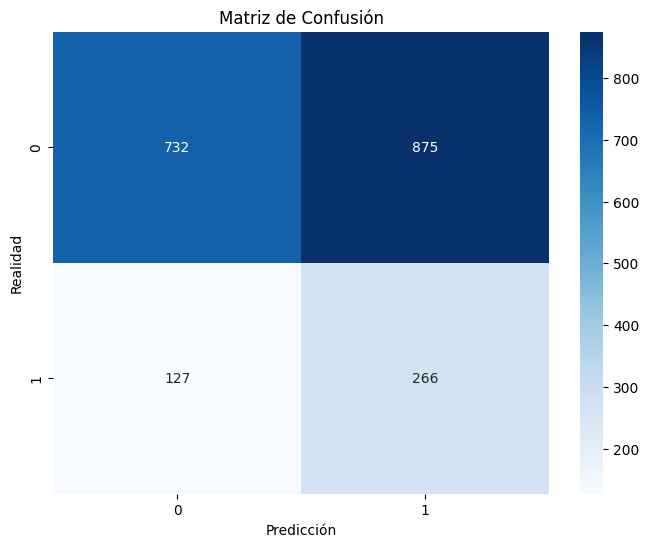

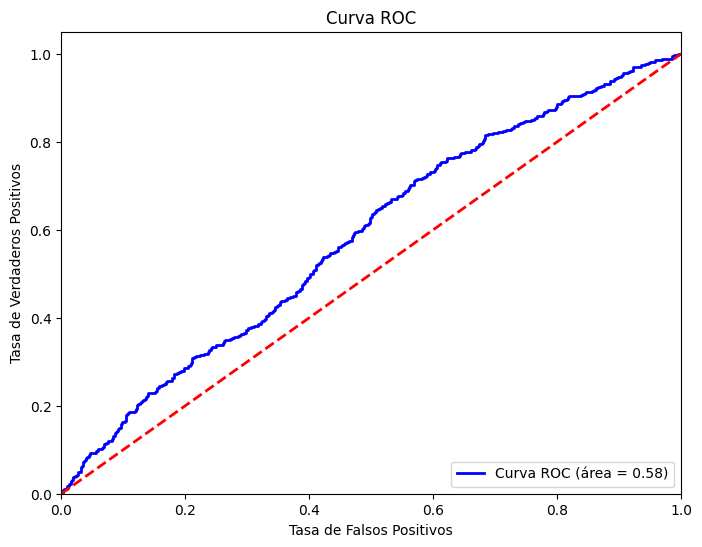

In [59]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Cargar los datos
df = pd.read_csv(file_path)

df.fillna(method='ffill', inplace=True)  # Manejo de valores faltantes
df = pd.get_dummies(df, drop_first=True)  # Codificación de variables categóricas

# División de datos
X = df.drop('Exited', axis=1)  # Variable objetivo, para saber cuáles fueron los clientes que se fueron del banco.
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para el sobremuestreo de la clase minoritaria en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Construcción del modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualización de la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
